<div align="center">
      <h1>Training the Multilayer Perceptron (MLP)</h1>
      <hr>
      <p>In this notebook, we will train the MLP on the CIFAR-10 dataset. We will show the effect of different hyperparameters on the training process.</p>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

In [3]:
from utils.cifar import download_cifar10

# download the CIFAR-10 dataset
cifar10_dir = './data/datasets/CIFAR10'
download_cifar10(cifar10_dir)

CIFAR-10 dataset already exists


In [3]:
from utils.cifar import load_cifar10
from assignments.preprocessing import reshape_to_vectors, normalize_data

X_train, y_train, X_test, y_test = load_cifar10(cifar10_dir)

# Reshape the image data into rows
X_train = reshape_to_vectors(X_train)
X_test = reshape_to_vectors(X_test)

# Normalize the data
X_train = normalize_data(X_train)
X_test = normalize_data(X_test)

## Training the MLP

This assignment is all about choosing the right hyperparameters for the MLP. You will have to experiment with different values for the hyperparameters and observe the effect on the training process. Your task is to achieve the highest possible accuracy on the test set. Don't worry about validation set for now, the validation and test set are the same in this assignment. 

The hyperparameters that you will have to experiment with are:

In [1]:
# Hyperparameters for the MLP
hidden_dim_1 = 20  # the number of hidden units in the first hidden layer (int)
hidden_dim_2 = 15  # the number of hidden units in the second hidden layer (int)
weight_scale = 0.1  # the standard deviation of the normal distribution used for weight init (float)
reg = 0.1  # the regularization strength (float)
learning_rate = 0.001  # the learning rate (float)
batch_size = 100  # the batch size (int)
num_iters = 2000  # the number of iterations (int)

In [ ]:
from sklearn.metrics import accuracy_score
from assignments.mlp_classifier import MLPClassifier

input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))

nn = MLPClassifier(input_size, hidden_dim_1,
                   hidden_dim_2, num_classes,
                   activation='relu',
                   weight_scale=weight_scale,
                   learning_rate=learning_rate,
                   reg=reg,
                   batch_size=batch_size,
                   num_iters=num_iters,
                   verbose=True)

loss_history, acc_history = nn.train(X_train, y_train, X_test, y_test)

# Compute the accuracy on the training and testing set
y_test_pred = nn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {test_accuracy:.2f}')

Training:   0%|          | 0/2000 [00:00<?, ?it/s]

/home/ezvezdov/Programming/UROB/hw/hw2/utils/engine.py:285: RuntimeWarning: divide by zero encountered in log
  out = Tensor(-np.sum(one_hot_target * np.log(softmax) / N), (self,), f"CE Loss \n(target={target})")
/home/ezvezdov/Programming/UROB/hw/hw2/utils/engine.py:285: RuntimeWarning: invalid value encountered in multiply
  out = Tensor(-np.sum(one_hot_target * np.log(softmax) / N), (self,), f"CE Loss \n(target={target})")
Training:  50%|████▉     | 996/2000 [00:25<00:20, 48.80it/s]

In [ ]:
from utils.general import plot_nn_training

plot_nn_training(loss_history, acc_history, ema=True, alpha=0.5)

## Training Summary

Share a brief summary of your training results. Discuss the hyperparameters you experimented with and their impact on the training process. Highlight the highest accuracy you attained and the ultimate accuracy on the test and training sets. Ensure to include visuals showcasing (images) a suboptimal training process and the most successful training process you accomplished. Elaborate on the distinctions between these two training scenarios.

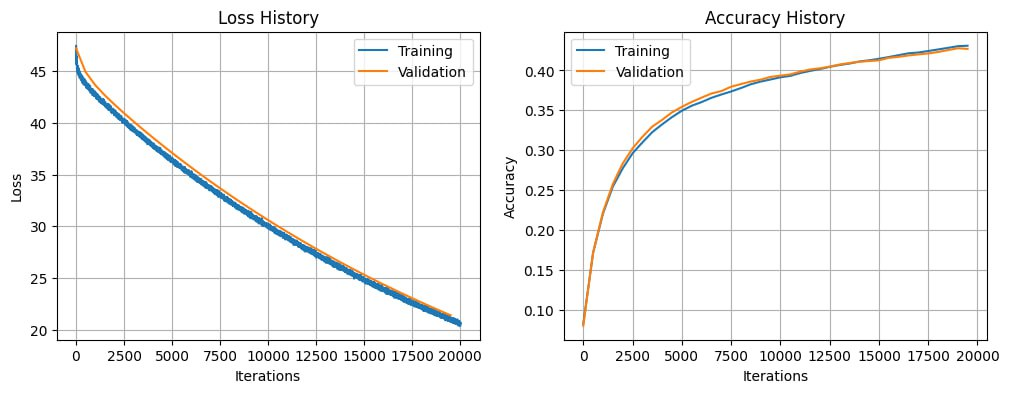

In [ ]:
# Highest accuracy: 0.43

hidden_dim_1 = 128 # the number of hidden units in the first hidden layer (int)
hidden_dim_2 = 64  # the number of hidden units in the second hidden layer (int)
weight_scale = 0.1  # the standard deviation of the normal distribution used for weight init (float)
reg = 0.01  # the regularization strength (float)
learning_rate = 0.001  # the learning rate (float)
batch_size = 32 # the batch size (int)
num_iters = 20000  # the number of iterations (int)

# big learning_rate, weight_scale, reg = bad result
# small amount of hidden layers = big result
# big num_iters,batch_size = good result